In [5]:
from pystac_client import Client
import rasterio
import matplotlib.pyplot as plt

In [ ]:
client = Client.open("https://earth-search.aws.element84.com/v1")

In [10]:
# Open the STAC client to connect to the Earth Search catalog
client = Client.open("https://earth-search.aws.element84.com/v1")

# Perform a search for Sentinel-2 L2A imagery within the specified bounding box
search = client.search(
    max_items=10,
    collections=['sentinel-2-l2a'],
    bbox=[-72.5, 40.5, -72, 41], 
    datetime='2024-06-20T22:43:42.099Z'
)

# Convert the search results to a dictionary
search_results = search.item_collection_as_dict()

# Check if any results are found
if not search_results['features']:
    raise ValueError("No search results found")

ValueError: No search results found

In [9]:
search_results

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'stac_version': '1.0.0',
   'id': 'S2B_18TYK_20240620_0_L2A',
   'properties': {'created': '2024-06-20T22:43:42.099Z',
    'platform': 'sentinel-2b',
    'constellation': 'sentinel-2',
    'instruments': ['msi'],
    'eo:cloud_cover': 20.44099,
    'proj:epsg': 32618,
    'mgrs:utm_zone': 18,
    'mgrs:latitude_band': 'T',
    'mgrs:grid_square': 'YK',
    'grid:code': 'MGRS-18TYK',
    'view:sun_azimuth': 139.558777181009,
    'view:sun_elevation': 69.3519510627544,
    's2:degraded_msi_data_percentage': 0.0212,
    's2:nodata_pixel_percentage': 7.871252,
    's2:saturated_defective_pixel_percentage': 0,
    's2:dark_features_percentage': 0,
    's2:cloud_shadow_percentage': 0,
    's2:vegetation_percentage': 0,
    's2:not_vegetated_percentage': 0.003699,
    's2:water_percentage': 79.555315,
    's2:unclassified_percentage': 0,
    's2:medium_proba_clouds_percentage': 1.450239,
    's2:high_proba_clouds_percentage': 

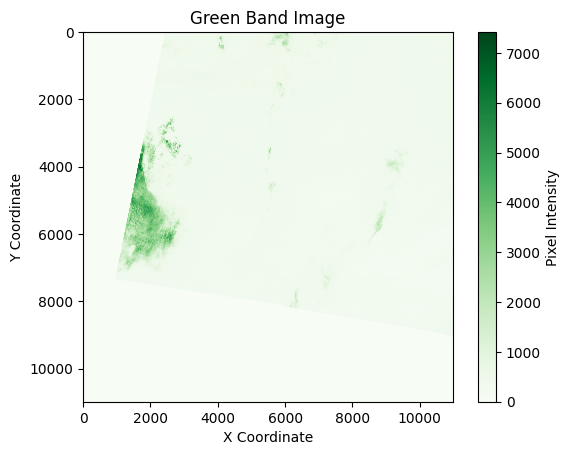

In [28]:
# Open the STAC client to connect to the Earth Search catalog
client = Client.open("https://earth-search.aws.element84.com/v1")

# Perform a search for Sentinel-2 L2A imagery within the specified bounding box
search = client.search(
    max_items=10,
    collections=['sentinel-2-l2a'],
    bbox=[-72.5, 40.5, -72, 41]
)

# Convert the search results to a dictionary
search_results = search.item_collection_as_dict()

# Check if any results are found
if not search_results['features']:
    raise ValueError("No search results found")

# Extract the URL for the green band of the first result
green_band_url = search_results['features'][0]['assets']['green']['href']

# Open the green band image using Rasterio
with rasterio.open(green_band_url) as src:
    green_band_data = src.read(1)
    
    # Plot the green band image
    plt.imshow(green_band_data, cmap='Greens')
    plt.title("Green Band Image")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.colorbar(label="Pixel Intensity")
    plt.show()


In [3]:
client

<Client id=earth-search-aws>

In [16]:
search = client.search(
    max_items=10,
    collections=['sentinel-2-l2a'],
    bbox=[-72.5,40.5,-72,41]
)


In [26]:
dir(client.search)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [17]:
print(f"{search.matched()} items found")

4881 items found


In [6]:
for item in search.items():
    print(item.id)


S2B_18TYK_20240617_0_L2A
S2B_19TBE_20240617_0_L2A
S2B_18TYL_20240617_0_L2A
S2B_19TBF_20240617_0_L2A
S2A_18TYK_20240615_0_L2A
S2A_19TBE_20240615_0_L2A
S2A_18TYL_20240615_0_L2A
S2A_19TBF_20240615_0_L2A
S2A_18TYK_20240612_0_L2A
S2A_19TBE_20240612_0_L2A


In [7]:
item_collection = search.item_collection()
item_collection.save_object('my_itemcollection.json')

In [8]:
resdict = search.item_collection_as_dict()

In [22]:
len(resdict["features"])

10

In [24]:
resdict["features"][1].keys()

dict_keys(['type', 'stac_version', 'id', 'properties', 'geometry', 'links', 'assets', 'bbox', 'stac_extensions', 'collection'])

In [10]:
resdict['features'][0]['assets']['green']['href']

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/18/T/YK/2024/6/S2B_18TYK_20240617_0_L2A/B03.tif'

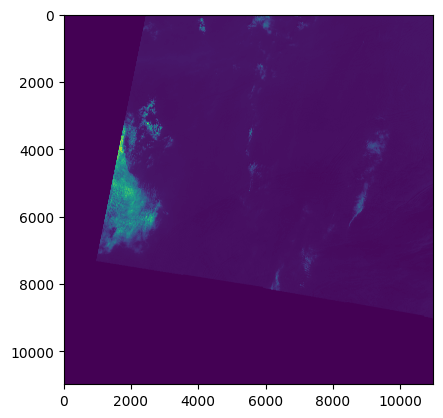

In [11]:
url = resdict['features'][0]['assets']['green']['href']
src = rasterio.open(url)
plt.imshow(src.read(1))

In [18]:
src

<open DatasetReader name='https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/18/T/YK/2024/6/S2B_18TYK_20240617_0_L2A/B03.tif' mode='r'>